# Cluster Profiles

This notebook explores the created clusters and their profiles with kmeans (k=4).

# Environment & Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sns.set(style="whitegrid", context="notebook")

CLUSTERS_CSV = "../data/processed/final_master_with_k4_clusters.csv"
df = pd.read_csv(CLUSTERS_CSV)

# Vizualization settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Perform KMeans clustering with 4 clusters
#kmeans_4 = KMeans(n_clusters=4, random_state=42)
#labels_4 = kmeans_4.fit_predict(X)

# Create a copy to compare both clusterings
#df_clusters = dfp[[id_col]].copy()
#df_clusters["k4_cluster"] = labels_4

In [ ]:
# Add ortsteil back to your PCA dataframe
#df_pca = pd.DataFrame(X, columns=[f"PC{i+1}" for i in range(X.shape[1])])
#dfp["ortsteil"] = ids.values  

# Add cluster labels
#dfp["k4_cluster"] = kmeans_4.labels_

# Merge cluster labels into master table
#df_clustered = df.merge(
 #   dfp[["ortsteil", "k4_cluster"]],
  #  on="ortsteil"
#)

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_radar_chart(cluster_id, scaled_profiles, features):
    values = scaled_profiles.loc[cluster_id].values
    N = len(features)

    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, rotation=45, ha="right")
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["0.2","0.4","0.6","0.8","1.0"])
    ax.set_title(f"Cluster {cluster_id}: Profile Overview", size=14, pad=20)
    plt.show()


In [62]:
# Choose a few key features
features = [
    "subdistrict_avg_median_income_eur",
    "subdistrict_avg_mietspiegel_classification",
    "total_population",
    "subdistrict_youth_share",
    "subdistrict_senior_share",
    "cafes",
    "bar",
    "restaurant",
    "nightclub",
    "supermarket",
    "subdistrict_middle_age_population",
    "green_space",
    "schools",

]

from sklearn.preprocessing import MinMaxScaler



In [63]:
import seaborn as sns

def plot_cluster_bars(merged, cluster_col, metrics):
    melted = merged.groupby(cluster_col)[metrics].mean().reset_index().melt(id_vars=cluster_col)
    plt.figure(figsize=(12,6))
    sns.barplot(data=melted, x="variable", y="value", hue=cluster_col)
    plt.title("Cluster Comparison of Key Metrics")
    plt.xlabel("")
    plt.ylabel("")



# Clusters Overview

In [64]:
# Number of subdistricts per cluster
print(df["k4_cluster"].value_counts().sort_index())

k4_cluster
0    57
1     5
2    32
3     2
Name: count, dtype: int64


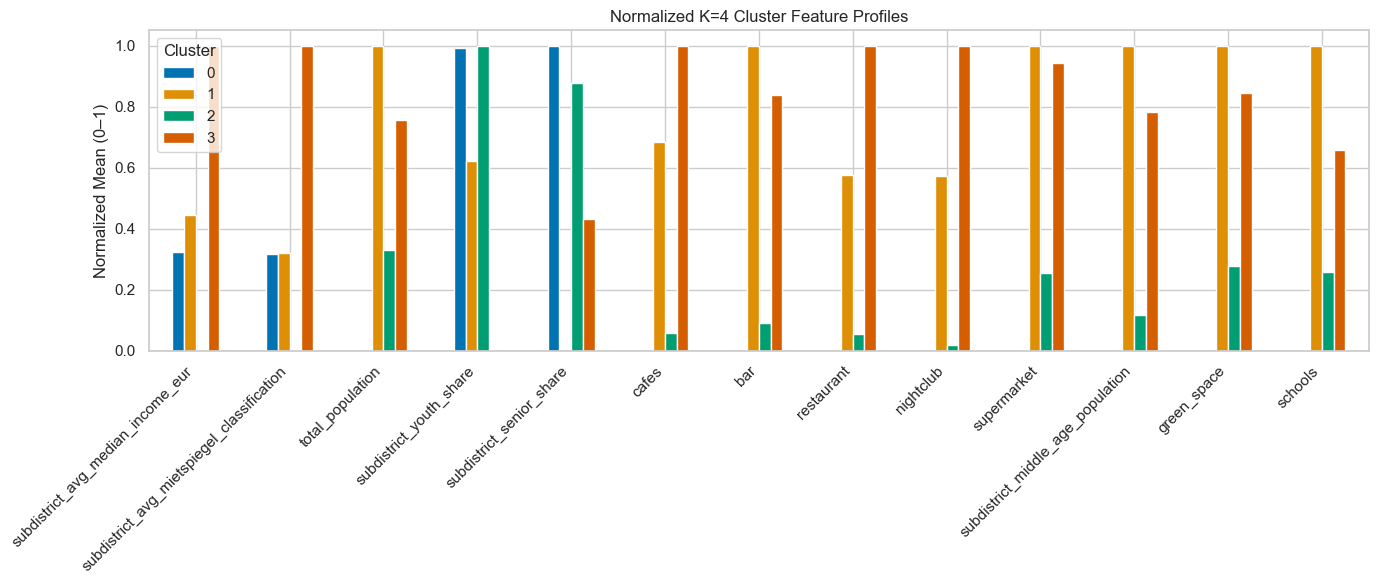

In [66]:
# Group original data by k=4 clusters
k4_profiles = df.groupby("k4_cluster").mean(numeric_only=True)

# Scale only the numeric cluster means
scaler = MinMaxScaler()
k4_scaled = pd.DataFrame(
    scaler.fit_transform(k4_profiles[features]),
    columns=features,
    index=k4_profiles.index
)

# Plot
k4_scaled.T.plot(kind="bar", figsize=(14, 6))
plt.title("Normalized K=4 Cluster Feature Profiles")
plt.ylabel("Normalized Mean (0–1)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()

In [67]:
k4_profiles[features].round(1).T

k4_cluster,0,1,2,3
subdistrict_avg_median_income_eur,4100.4,4178.0,3890.2,4537.2
subdistrict_avg_mietspiegel_classification,1.9,1.9,1.7,2.5
total_population,15438.9,148427.2,59540.7,115848.5
subdistrict_youth_share,0.2,0.2,0.2,0.1
subdistrict_senior_share,0.2,0.1,0.2,0.2
cafes,5.3,185.4,20.5,268.5
bar,1.4,86.2,9.0,72.5
restaurant,13.0,306.4,41.8,522.0
nightclub,0.2,13.0,0.6,22.5
supermarket,5.6,60.2,19.5,57.0


# Clusters Key Metrics Comparison

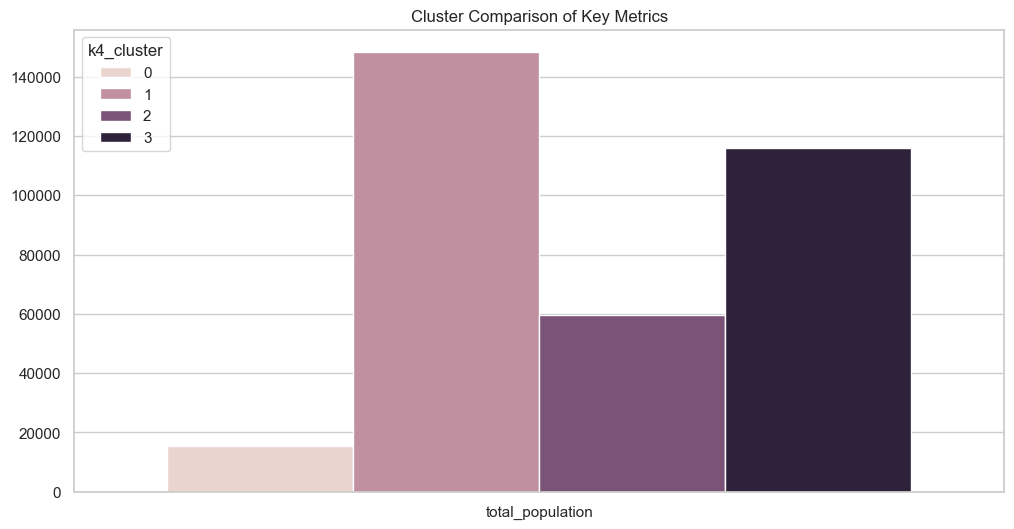

In [68]:
key_metrics = ["total_population"]
plot_cluster_bars(df, "k4_cluster", key_metrics)

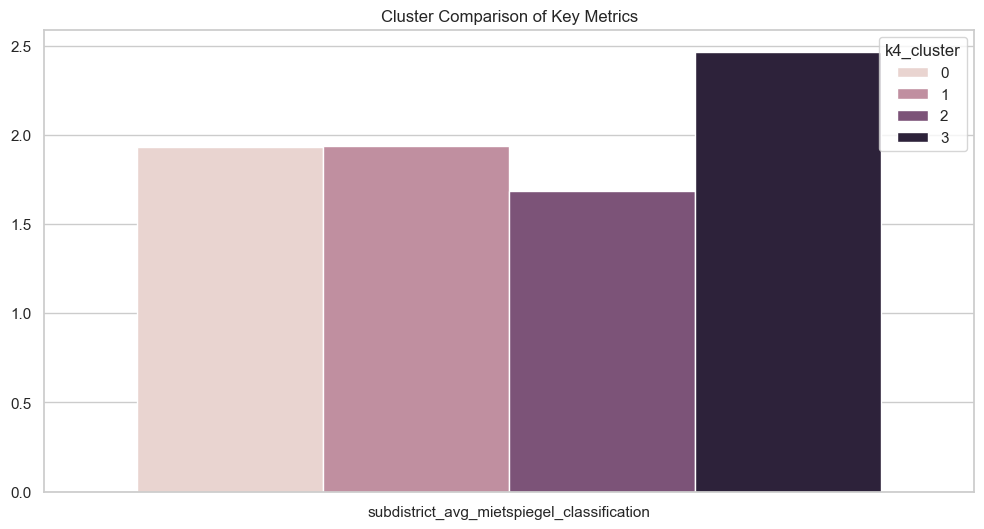

In [69]:
key_metrics = ["subdistrict_avg_mietspiegel_classification"]
plot_cluster_bars(df, "k4_cluster", key_metrics)

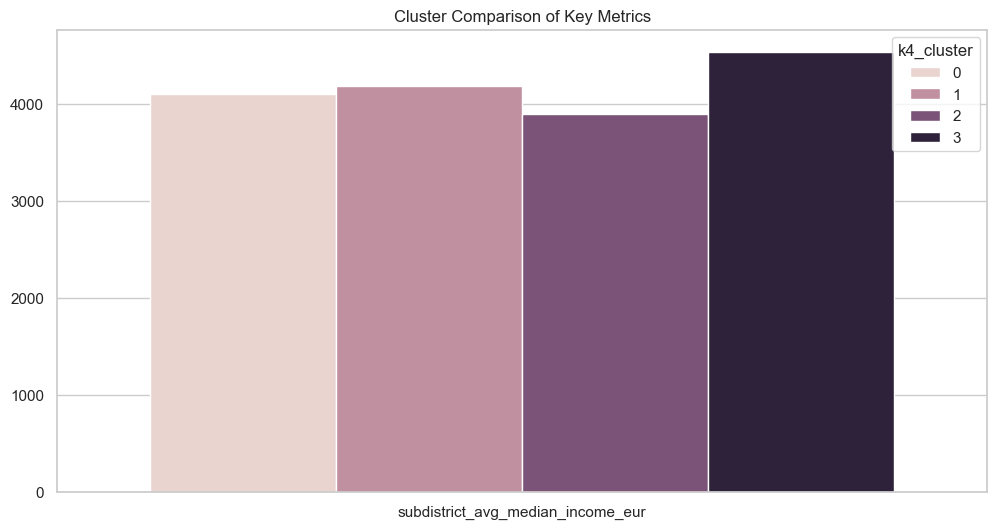

In [70]:
key_metrics = ["subdistrict_avg_median_income_eur"]
plot_cluster_bars(df, "k4_cluster", key_metrics)

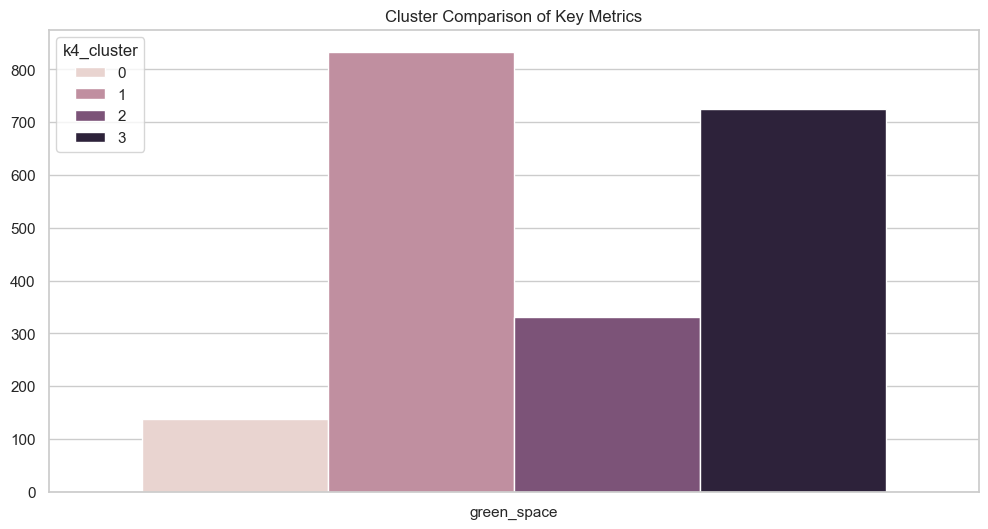

In [71]:
key_metrics = ["green_space"]
plot_cluster_bars(df, "k4_cluster", key_metrics)

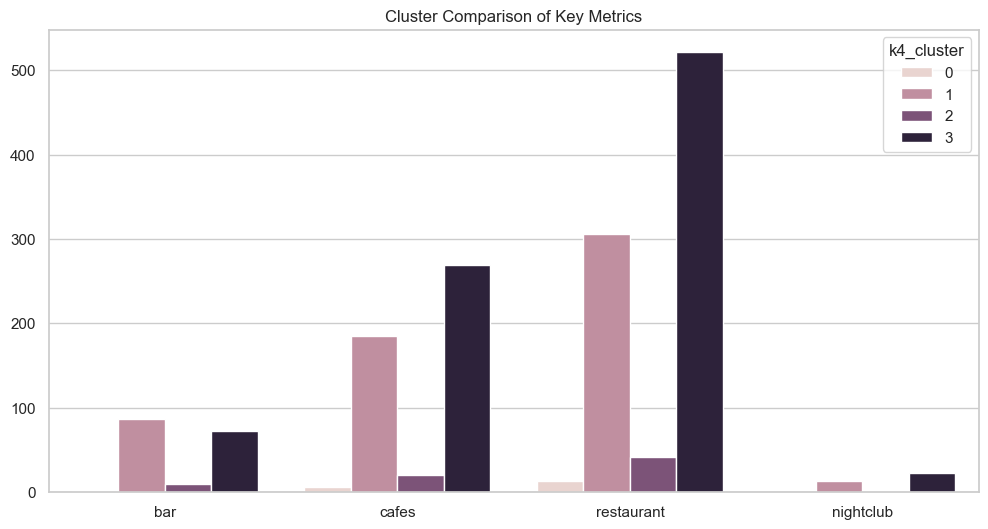

In [72]:
key_metrics = ["bar", "cafes", "restaurant", "nightclub"]
plot_cluster_bars(df, "k4_cluster", key_metrics)

# Subdistrict Clusters Profiles

## Cluster 0 

**Small, Balanced Subdistricts (57 subdistricts)**

* Population: Smallest (~15k average), more local/quiet neighborhoods.
* Demographics: Balanced youth and senior share (~20% each), middle-aged relatively lower.
* Income: ~€4,100 median – average affordability.
* Housing: Mietspiegel ~1.9 → lower-to-mid rent level.
* Amenities: Very few cafés, bars, restaurants, or supermarkets.
* Green space: Limited (~138 ha).
* Schools: Low (~16).

➡️ **Profile**: Suburban/quiet residential areas with modest incomes, limited nightlife & amenities, but affordable rents. Likely attractive for families wanting calm + affordability.

➡️ **Subdistricts**: Adlershof, Alt-treptow, Altglienicke, Baumschulenweg, Biesdorf, Blankenburg, Blankenfelde, Bohnsdorf, Borsigwalde, Buch, Charlottenburg-Nord, Dahlem, Falkenberg, Fennpfuhl, Französisch Buchholz, Friedenau, Friedrichshagen, Frohnau, Gatow, Grunewald, Grünau, Hakenfelde, Halensee, Hansaviertel, Haselhorst, Heiligensee, Heinersdorf, Hermsdorf, Johannisthal, Karlshorst, Karow, Kaulsdorf, Kladow, Konradshöhe, Lübars, Mahlsdorf, Malchow, Marienfelde, Müggelheim, Niederschöneweide, Niederschönhausen, Nikolassee, Oberschöneweide, Plänterwald, Rahnsdorf, Rosenthal, Rummelsburg, Schmargendorf, Schmöckwitz, Siemensstadt, Stadtrandsiedlung Malchow, Tiergarten, Waidmannslust, Wannsee, Wartenberg, Wilhelmsruh, Wittenau

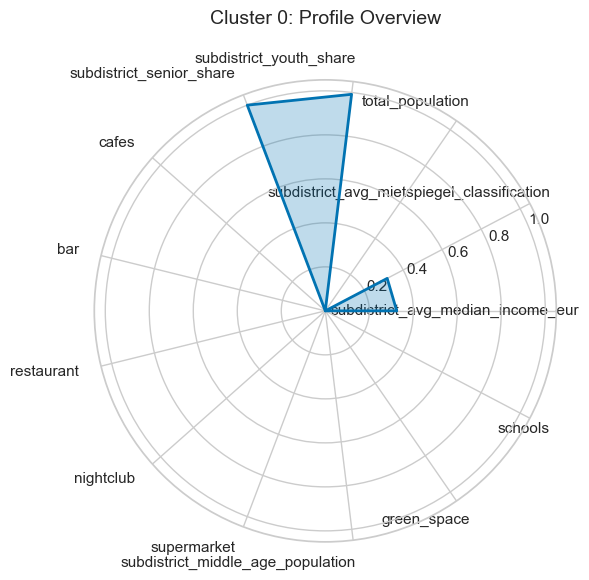

In [73]:
plot_radar_chart(0, k4_scaled, features)

In [ ]:
# subdistict list of cluster 0
subdistricts_cluster_0 = df[df["k4_cluster"] == 0]["ortsteil"].tolist()
print("Subdistricts in Cluster 0:", subdistricts_cluster_0)

Subdistricts in Cluster 0: ['adlershof', 'alt-treptow', 'altglienicke', 'baumschulenweg', 'biesdorf', 'blankenburg', 'blankenfelde', 'bohnsdorf', 'borsigwalde', 'buch', 'charlottenburg-nord', 'dahlem', 'falkenberg', 'fennpfuhl', 'franzoesisch buchholz', 'friedenau', 'friedrichshagen', 'frohnau', 'gatow', 'grunewald', 'gruenau', 'hakenfelde', 'halensee', 'hansaviertel', 'haselhorst', 'heiligensee', 'heinersdorf', 'hermsdorf', 'johannisthal', 'karlshorst', 'karow', 'kaulsdorf', 'kladow', 'konradshoehe', 'luebars', 'mahlsdorf', 'malchow', 'marienfelde', 'mueggelheim', 'niederschoeneweide', 'niederschoenhausen', 'nikolassee', 'oberschoeneweide', 'plaenterwald', 'rahnsdorf', 'rosenthal', 'rummelsburg', 'schmargendorf', 'schmoeckwitz', 'siemensstadt', 'stadtrandsiedlung malchow', 'tiergarten', 'waidmannslust', 'wannsee', 'wartenberg', 'wilhelmsruh', 'wittenau']


## Cluster 1

**Large, Amenity-Rich Districts (5 subdistricts)**

* Population: Very high (~148k average) – major hubs.
* Demographics: Slightly younger skew (lower senior share).
* Income: ~€4,200 median – average affordability.
* Housing: Mietspiegel ~1.9 → affordable-to-mid rents.
* Amenities: High density of cafés (~185), bars (~86), restaurants (~306).
* Green space: Largest (~833 ha).
* Schools: High (~155).

➡️ Profile: Central, highly urban subdistricts with lots of social & cultural infrastructure, large populations, and good affordability. Likely Berlin’s vibrant core neighborhoods.

➡️ Subdistricts: Friedrichshain, Kreuzberg, Neukölln, Prenzlauer berg, and Schöneberg

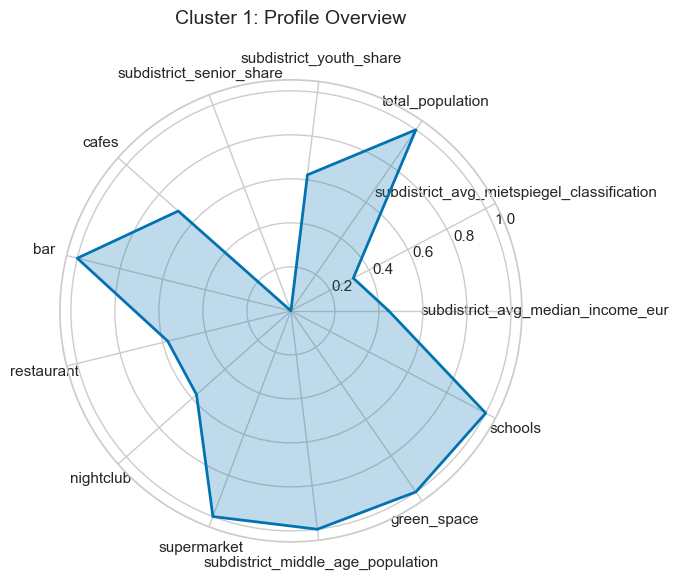

In [56]:
plot_radar_chart(1, k4_scaled, features)

In [75]:
# subdistict list of cluster 1
subdistricts_cluster_1 = df[df["k4_cluster"] == 1]["ortsteil"].tolist()
print("Subdistricts in Cluster 1:", subdistricts_cluster_1)

Subdistricts in Cluster 1: ['friedrichshain', 'kreuzberg', 'neukoelln', 'prenzlauer berg', 'schoeneberg']


## Cluster 2

**Mid-Sized, Affordable Areas (32 subdistricts)**

* Population: Medium (~59k).
* Demographics: Balanced youth/senior (~20%).
* Income: Lowest (~€3,900 median).
* Housing: Mietspiegel ~1.7 → most affordable rents.
* Amenities: Low-to-moderate cafés (~20), bars (~9), restaurants (~42).
* Green space: Moderate (~332 ha).
* chools: Moderate (~52).

➡️ Profile: Affordable, mid-sized neighborhoods with fewer amenities. Likely working-class or peripheral subdistricts, attractive for affordability seekers.

➡️ Subdistricts: Alt-hohenschönhausen, Britz, Buckow, Falkenhagener Feld, Friedrichsfelde, Gesundbrunnen, Gropiusstadt, Hellersdorf, Köpenick, Lankwitz, Lichtenberg, Lichtenrade, Lichterfelde, Mariendorf, Marzahn, Moabit, Märkisches Viertel, Neu-Hohenschönhausen, Pankow, Reinickendorf, Rudow, Spandau, Staaken, Steglitz, Tegel, Tempelhof, Wedding, Weissensee, Westend, Wilhelmstadt, Wilmersdorf, and Zehlendorf

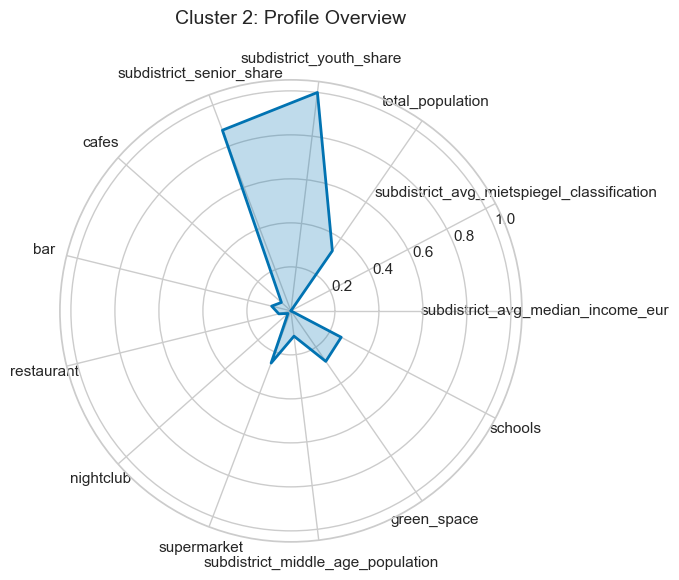

In [57]:
plot_radar_chart(2, k4_scaled, features)

In [76]:
# subdistict list of cluster 2
subdistricts_cluster_2 = df[df["k4_cluster"] == 2]["ortsteil"].tolist()
print("Subdistricts in Cluster 2:", subdistricts_cluster_2)

Subdistricts in Cluster 2: ['alt-hohenschoenhausen', 'britz', 'buckow', 'falkenhagener feld', 'friedrichsfelde', 'gesundbrunnen', 'gropiusstadt', 'hellersdorf', 'koepenick', 'lankwitz', 'lichtenberg', 'lichtenrade', 'lichterfelde', 'mariendorf', 'marzahn', 'moabit', 'maerkisches viertel', 'neu-hohenschoenhausen', 'pankow', 'reinickendorf', 'rudow', 'spandau', 'staaken', 'steglitz', 'tegel', 'tempelhof', 'wedding', 'weissensee', 'westend', 'wilhelmstadt', 'wilmersdorf', 'zehlendorf']


## Cluster 3

**Wealthy, High-Amenity Areas (2 subdistricts)**

* Population: Large (~116k average).
* Demographics: Slightly lower youth share, higher senior share.
* Income: Highest (~€4,500 median).
* Housing: Mietspiegel ~2.5 → most expensive rents.
* Amenities: Highest density – cafés (~269), bars (~73), restaurants (~522), nightclubs (~23).
* Green space: High (~724 ha).
* Schools: Moderate-high (~108).

➡️ Profile: Affluent, vibrant subdistricts with high rents and many amenities. Likely trendy/wealthy hotspots (e.g. Charlottenburg/Mitte type areas).

➡️ Subdistricts: Charlottenburg and Mitte

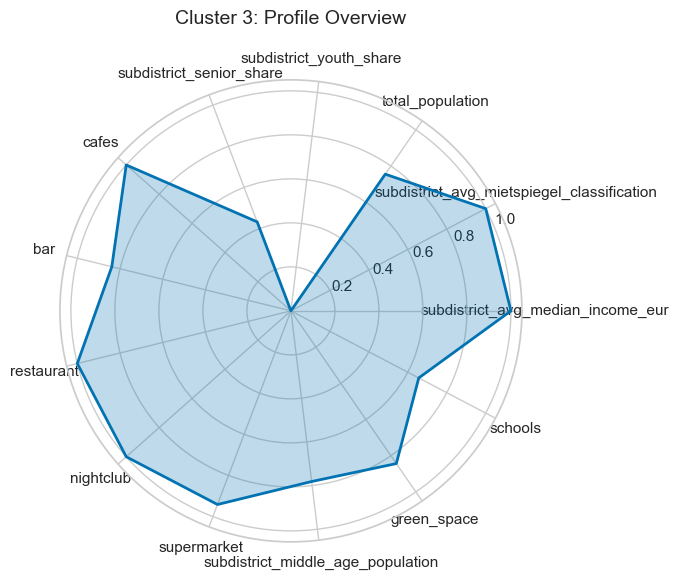

In [58]:
plot_radar_chart(3, k4_scaled, features)

In [77]:
# subdistict list of cluster 3
subdistricts_cluster_3 = df[df["k4_cluster"] == 3]["ortsteil"].tolist()
print("Subdistricts in Cluster 3:", subdistricts_cluster_3)

Subdistricts in Cluster 3: ['charlottenburg', 'mitte']


## Summary

* Cluster 0: Quiet, small, affordable suburbs.
* Cluster 1: Big, vibrant, centrally affordable hubs.
* Cluster 2: Affordable mid-sized areas with fewer amenities.
* Cluster 3: Wealthy, trendy, high-rent hotspots.
